In this notebook, we use different Machine Learning classification algorithms to predict the species of flowers which is mentioned in the dataset. The dataset is small and it is good to begin with. This is a beginner exercises in Machine Learning. The dataset can be found here : https://www.kaggle.com/uciml/iris

In [1]:
#We import the necessary modules. In the meantime, we are only importing pandas. 
import pandas as pd

In [2]:
dataframe = pd.read_csv('Iris.csv') #we read the csv file into the dataframe
dataframe.head() #show the first five elements in the dataframe. 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


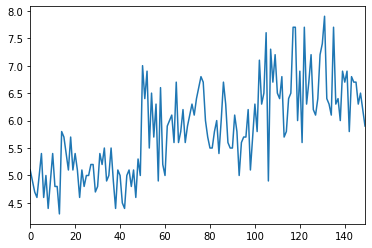

In [4]:
dataframe['SepalLengthCm'].plot() #we plot the sepal length to visualize the sepal length pattern in our data. 

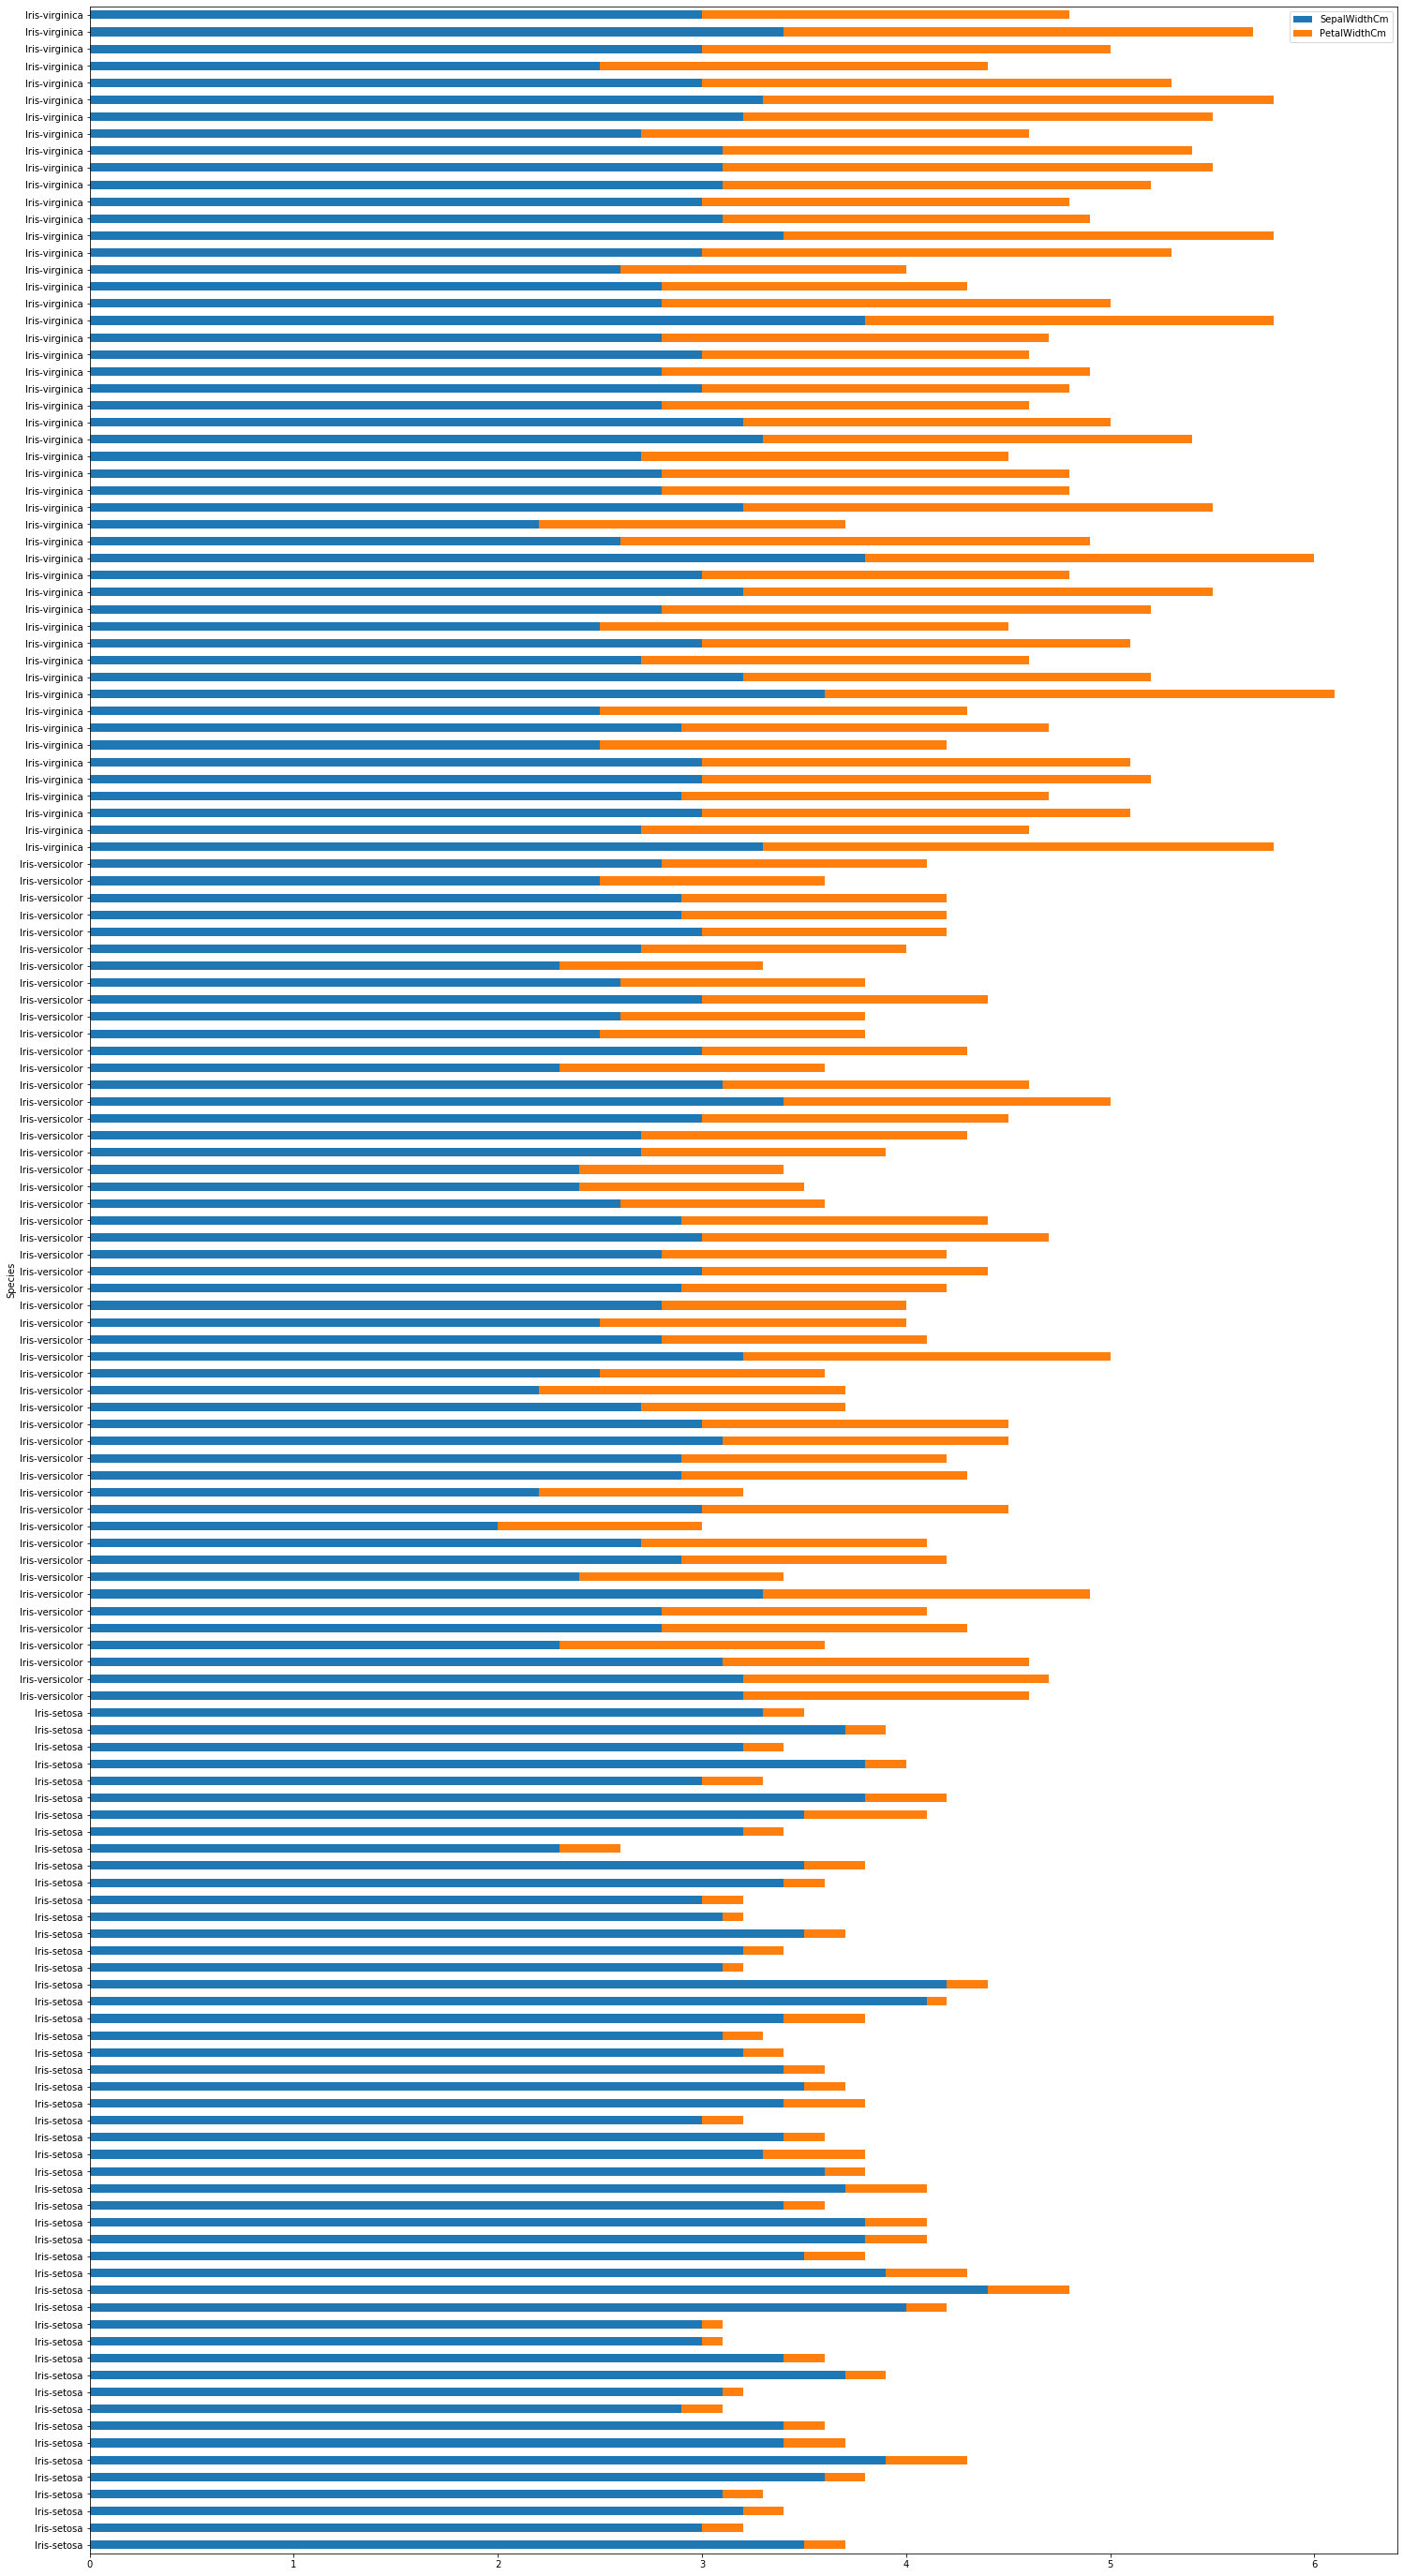

In [5]:
dataframe.plot.barh('Species', ['SepalWidthCm', 'PetalWidthCm'], figsize=(25,50), stacked = True) #plot the relation between sepal width and petal width to find the relation.

In the above figure, we can see a pattern in the distribution of Sepal width and Petal width. In the first category i.e., 'Iris-Setosa', Sepal Width is significantly larger than the petal Width. In the second category i.e., 'Iris-Versicolor', Sepal Width is almost twice the petal width however in the last category i.e., 'Iris-Virginica', Sepal Width is almost equal to the Petal Width. 

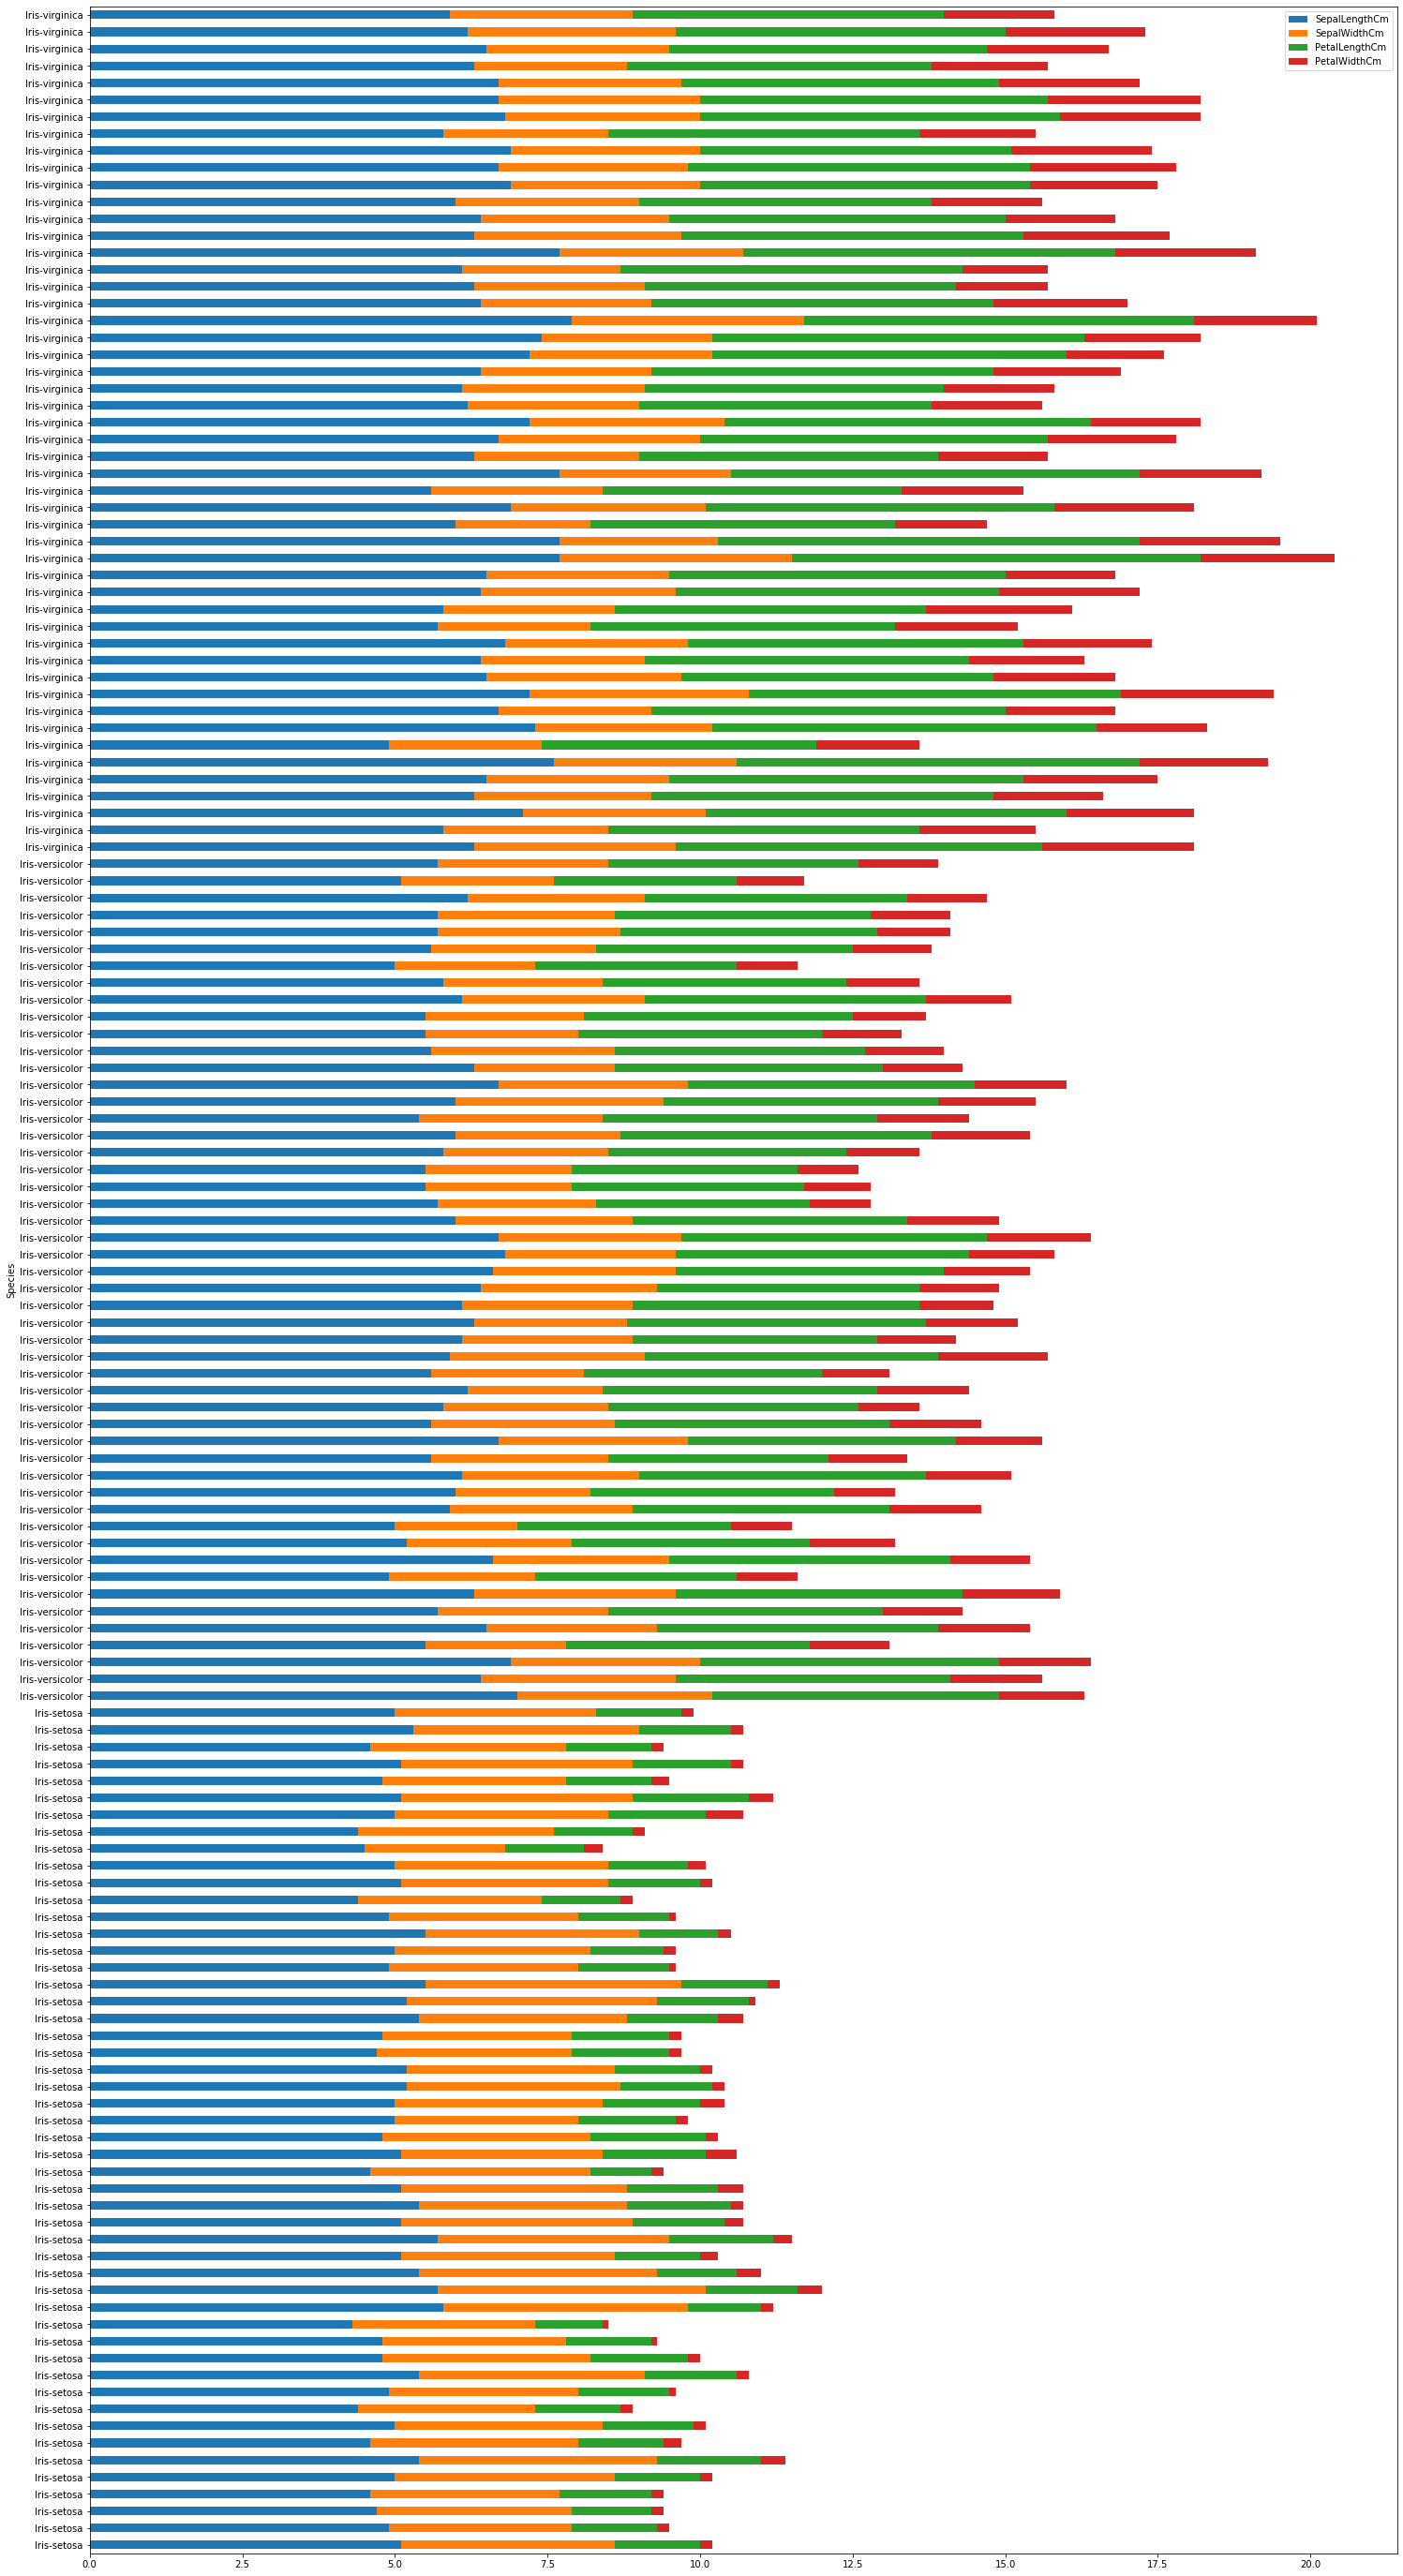

In [6]:
dataframe.plot.barh('Species', ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], figsize=(25,50), stacked = True) # we visualize all the four features of the dataset and we find some patterns in other features too. 

In [7]:
#we look at the average value of the columns in our data. 
print("mean of sepal length =", dataframe['SepalLengthCm'].mean())
print("mean of sepal width =", dataframe['SepalWidthCm'].mean())
print("mean of petal length =", dataframe['PetalLengthCm'].mean())
print("mean of petal width =", dataframe['PetalWidthCm'].mean())

mean of sepal length = 5.843333333333334
mean of sepal width = 3.0540000000000003
mean of petal length = 3.758666666666666
mean of petal width = 1.1986666666666668


In [8]:
#we look how much our column data are deviated. 
print("standard deviation of sepal length =", dataframe['SepalLengthCm'].std())
print("standard deviation of sepal width =", dataframe['SepalWidthCm'].std())
print("standard deviation of petal length =", dataframe['PetalLengthCm'].std())
print("standard deviation of petal width =", dataframe['PetalWidthCm'].std())

standard deviation of sepal length = 0.828066127977863
standard deviation of sepal width = 0.4335943113621737
standard deviation of petal length = 1.7644204199522626
standard deviation of petal width = 0.7631607417008411


In [9]:
from sklearn import preprocessing #we import the preprocessing module to scale the data

In [10]:
dataframe.iloc[:,1:5] = preprocessing.scale(dataframe.iloc[:,1:5])# we scale our numeric columns. 

In [11]:
dataframe.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,2,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,3,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,4,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,5,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa


In [12]:
#we again check the mean and the standard deviation of the numeric columns.
print("mean of sepal length =", dataframe['SepalLengthCm'].mean())
print("mean of sepal width =", dataframe['SepalWidthCm'].mean())
print("mean of petal length =", dataframe['PetalLengthCm'].mean())
print("mean of petal width =", dataframe['PetalWidthCm'].mean())
print("standard deviation of sepal length =", dataframe['SepalLengthCm'].std())
print("standard deviation of sepal width =", dataframe['SepalWidthCm'].std())
print("standard deviation of petal length =", dataframe['PetalLengthCm'].std())
print("standard deviation of petal width =", dataframe['PetalWidthCm'].std())

mean of sepal length = -4.736951571734001e-16
mean of sepal width = -6.631732200427602e-16
mean of petal length = 3.315866100213801e-16
mean of petal width = -2.842170943040401e-16
standard deviation of sepal length = 1.0033500931359767
standard deviation of sepal width = 1.0033500931359767
standard deviation of petal length = 1.0033500931359765
standard deviation of petal width = 1.0033500931359767


We again calculate the mean and the standard deviation of our data and find out that the mean is pretty low now and the standard deviation is 1, which is now good to process towards prediction using machine learning algorithms. 

In [13]:
from sklearn.model_selection import train_test_split #importing the train_test_module from sklearn
from sklearn import svm #importing the support vector machine module.
from sklearn import metrics #importing metrics to check accuracy, calculate confusion matrix and so on. 

In [14]:
train, test = train_test_split(dataframe, test_size = 0.3) #we divide our dataframe into test and train folds. the test size 0.3 states that 30% of our data is now stored as test and the remaining 70% is the train size randomly. 

In [15]:
#we see the shape of the train and the test dataset. 
print(train.shape)
print(test.shape)

(105, 6)
(45, 6)


In [16]:
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] #we define the columns we will be using to train. 
train_Y = train['Species'] #we specify the columns which will be using to train the prediction. 
test_X = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] #we specify the columns for testing the features. 
test_Y = test['Species'] # we specify the columns to test the results i.e., prediction

In [17]:
train_X.head() #we check our training data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
87,0.553333,-1.744778,0.364699,0.133226
126,0.432165,-0.587764,0.592162,0.790591
38,-1.748856,-0.124958,-1.398138,-1.312977
26,-1.021849,0.800654,-1.227541,-1.050031
67,-0.052506,-0.819166,0.194102,-0.261193


In [18]:
test_X.shape # we check our testing features shape. 

(45, 4)

In [19]:
test_manual = pd.DataFrame([['-1.26', '-0.12', '-1.34', '-1.44']]) # we specify a dataframe to check the result manually. 

In [20]:
test_manual.shape #we see the shape of our manual data and if it matches the test_X shape. 

(1, 4)

In [21]:
train_Y.head() #we look at the training data.

87     Iris-versicolor
126     Iris-virginica
38         Iris-setosa
26         Iris-setosa
67     Iris-versicolor
Name: Species, dtype: object

In [22]:
model = svm.SVC(kernel = 'linear', gamma = 'auto') # we specify our model to be Support Vector Classifier.
model.fit(train_X, train_Y) #we fit the training data to our model. 
prediction = model.predict(test_X) #we use the model to predict the result with our test dataset. 
print(prediction) #we print the predicted result. 
print("the accuracy of the model is", metrics.accuracy_score(prediction, test_Y)) #we use the accuracy_score method to check the accuracy of our model. 

['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica']
the accuracy of the model is 1.0


In [23]:
confusion_matrix = metrics.confusion_matrix(test_Y, prediction) #we build the confusion matrix of our test data and our predicted result from the svm algorithm.
print(confusion_matrix)

[[15  0  0]
 [ 0 17  0]
 [ 0  0 13]]


In the above confusion matrix, we can see that the model has classified all the first categories correctly. Hence, the accuracy of the model is 100%. 

In [24]:
#we try to classify the Species of the manually specified valued dataframe.
model = svm.SVC(gamma = 'auto')
model.fit(train_X, train_Y)
prediction = model.predict(test_manual)
print(prediction)

['Iris-setosa']


In [25]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression #we try to replicate the classification process with Logistic Regression.

In [26]:
logreg = LogisticRegression(solver = 'lbfgs', multi_class='auto') #We import the Logistic Regression module. 
logreg.fit(train_X, train_Y) #we fit the training data into the logistic regression. 
y_pred = logreg.predict(test_X) #we predict the result of our test dataset.
print("the accuracy with logistic regression is", metrics.accuracy_score(y_pred, test_Y)) #we calculate the accuracy of our test dataset.

the accuracy with logistic regression is 0.9777777777777777


In [27]:
#we see the confusion matrix from our logistic regression
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_Y, y_pred)
print(confusion_matrix)

[[15  0  0]
 [ 0 17  0]
 [ 0  1 12]]


We can see that the model classified first and second category correctly. However, in the third category, it confused one of them with the second category and hence the accuracy is 97.77%.

In [28]:
#We perform the classification problem with Naive Bayes Classification algorithm
from sklearn.naive_bayes import GaussianNB

In [29]:
model = GaussianNB() #we use the GaussianNB module. 

In [30]:
model.fit(train_X, train_Y) #we fit the training dataset into our model.

GaussianNB(priors=None, var_smoothing=1e-09)

In [31]:
predicted = model.predict(test_X) #We predict the our test dataset.
print("the accuracy of naive bayes is", metrics.accuracy_score(predicted, test_Y)) #We check the accuracy of our predicted test set

the accuracy of naive bayes is 0.9777777777777777


In [32]:
#We calculate the confusion matrix of our predicted result with Naive Bayes Algorithms
confusion_matrix = metrics.confusion_matrix(test_Y, predicted)
print(confusion_matrix)

[[15  0  0]
 [ 0 17  0]
 [ 0  1 12]]


We can see that the model classified first and second category correctly. However, in the third category, it confused one of them with the second category and hence the accuracy is 97.77%.

In [33]:
from sklearn.ensemble import RandomForestClassifier #we use random forest for our classification problem. 

In [34]:
clf = RandomForestClassifier(n_estimators = 100) #we mention the number of trees to be used as 100 and use the random forest classifier. 
clf.fit(train_X, train_Y) #we train random forest classifier with our training dataset. 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
y_pred = clf.predict(test_X) #we predict the result with our testing dataset. 
print("the accuracy of random forest is", metrics.accuracy_score(y_pred, test_Y)) #we print the accuracy of random forest algorithm. 

the accuracy of random forest is 0.9555555555555556


In [36]:
confusion_matrix = metrics.confusion_matrix(test_Y, y_pred)
print(confusion_matrix)

[[15  0  0]
 [ 0 17  0]
 [ 0  2 11]]


As the similar algorithms, we can see that the model classified first and second category correctly. However, in the third category, it confused two ofthem with the second category and hence the accuracy is 95.55%.